In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
import os

In [3]:
malignant_files = os.listdir("C:/Users/Devansh/Downloads/Cancer detection deep learning project/melanoma_cancer_dataset/malignant")
benign_files = os.listdir("C:/Users/Devansh/Downloads/Cancer detection deep learning project/melanoma_cancer_dataset/benign")
print(malignant_files[0:5])
print(malignant_files[-5:])
print(benign_files[0:5])
print(benign_files[-5:])

['melanoma_10105.jpg', 'melanoma_10106.jpg', 'melanoma_10107.jpg', 'melanoma_10108.jpg', 'melanoma_10109.jpg']
['melanoma_9600.jpg', 'melanoma_9601.jpg', 'melanoma_9602.jpg', 'melanoma_9603.jpg', 'melanoma_9604.jpg']
['melanoma_0.jpg', 'melanoma_1.jpg', 'melanoma_10.jpg', 'melanoma_100.jpg', 'melanoma_1000.jpg']
['melanoma_9995.jpg', 'melanoma_9996.jpg', 'melanoma_9997.jpg', 'melanoma_9998.jpg', 'melanoma_9999.jpg']


In [4]:
malignant_cases_number = len(malignant_files)
benign_cases_number = len(benign_files)

In [5]:
malignant_labels = [1]*malignant_cases_number
benign_labels = [0]*benign_cases_number
labels = malignant_labels+benign_labels

In [6]:
malignant_path = "C:/Users/Devansh/Downloads/Cancer detection deep learning project/melanoma_cancer_dataset/malignant/"
benign_path = "C:/Users/Devansh/Downloads/Cancer detection deep learning project/melanoma_cancer_dataset/benign/"


In [16]:
data = []
for img_file in malignant_files:
    image = Image.open(malignant_path + img_file)
    image = image.convert('RGB')
    image = image.resize((128,128))
    image = np.array(image)
    data.append(image)
    
for img_file in benign_files:
    image = Image.open(benign_path + img_file)
    image = image.convert('RGB')
    image = image.resize((128,128))
    image = np.array(image)
    data.append(image)

In [17]:
X = np.array(data)
Y = np.array(labels)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1 ,random_state=2)

In [19]:
X_train = X_train/255

In [20]:
X_test = X_test/255

In [21]:
num_of_classes = 2

model = keras.Sequential([
    
                    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
                    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                    keras.layers.Conv2D(64, kernel_size=(2,2), activation='relu'),
                    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                    keras.layers.Conv2D(128, kernel_size=(1,1), activation='relu'),
                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                        
                    keras.layers.Flatten(),
                    keras.layers.Dense(128, activation = 'relu'),
                    keras.layers.Dropout(0.5),
                
                
                    keras.layers.Dense(64, activation = 'relu'),    
                    keras.layers.Dropout(0.5),
                    
                    keras.layers.Dense(num_of_classes, activation = 'sigmoid'),
                        
                        
                        ])


In [22]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [24]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs = 50)

Epoch 1/50
269/269 [==============================] - 65s 243ms/step - loss: 0.3700 - acc: 0.8469 - val_loss: 0.3123 - val_acc: 0.8691
Epoch 2/50
269/269 [==============================] - 65s 240ms/step - loss: 0.3063 - acc: 0.8741 - val_loss: 0.3007 - val_acc: 0.8754
Epoch 3/50
269/269 [==============================] - 64s 239ms/step - loss: 0.2765 - acc: 0.8871 - val_loss: 0.2644 - val_acc: 0.8838
Epoch 4/50
269/269 [==============================] - 64s 239ms/step - loss: 0.2712 - acc: 0.8900 - val_loss: 0.3072 - val_acc: 0.8785
Epoch 5/50
269/269 [==============================] - 65s 242ms/step - loss: 0.2615 - acc: 0.8936 - val_loss: 0.2743 - val_acc: 0.8859
Epoch 6/50
269/269 [==============================] - 65s 241ms/step - loss: 0.2536 - acc: 0.8966 - val_loss: 0.2898 - val_acc: 0.8785
Epoch 7/50
269/269 [==============================] - 64s 239ms/step - loss: 0.2464 - acc: 0.8957 - val_loss: 0.2696 - val_acc: 0.8911
Epoch 8/50
269/269 [==============================] - 6

In [26]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy = ", accuracy*100,"%")
print("Loss is: ", loss)

34/34 [==============================] - 2s 51ms/step - loss: 0.3678 - acc: 0.9095
Accuracy =  90.95193147659302 %
Loss is:  0.36776939034461975


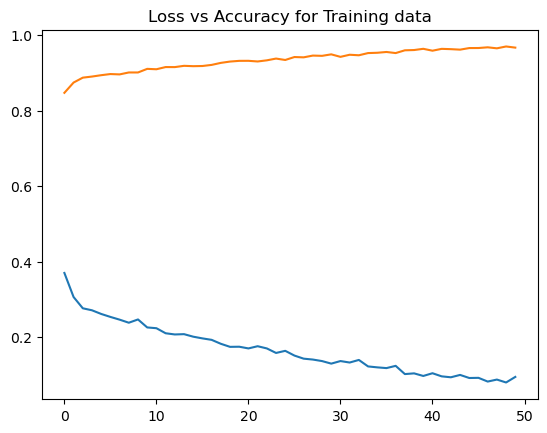

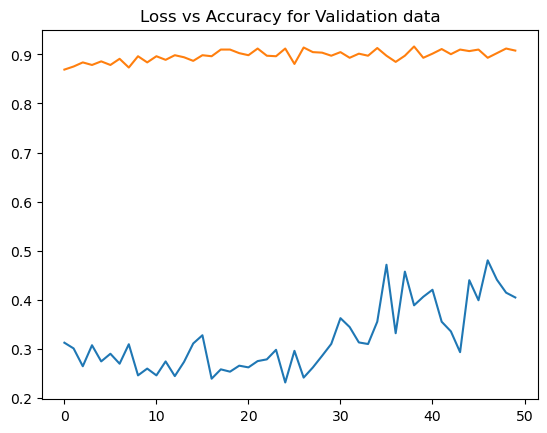

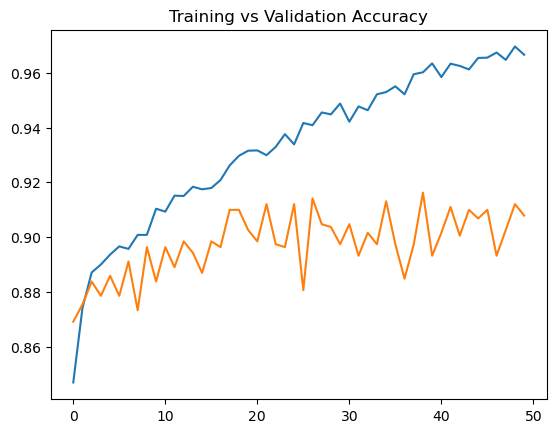

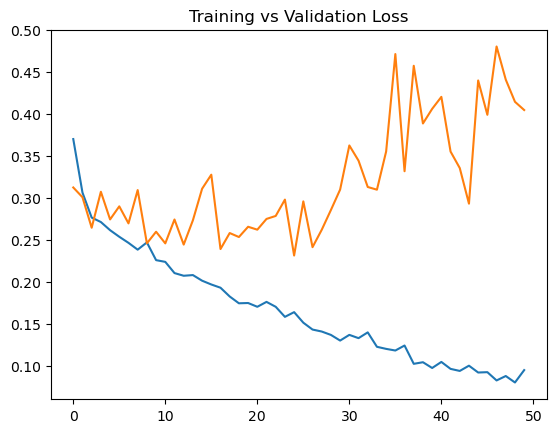

In [34]:
h = history
plt.plot(h.history["loss"], label = 'Train Loss')
plt.plot(h.history["acc"], label = 'Train Accuracy')
plt.title("Loss vs Accuracy for Training data")
plt.show()

plt.plot(h.history["val_loss"], label = 'Train Loss')
plt.plot(h.history["val_acc"], label = 'Train Accuracy')
plt.title("Loss vs Accuracy for Validation data")
plt.show()

plt.plot(h.history["acc"], label = 'Train Accuracy')
plt.plot(h.history["val_acc"], label = 'Train Accuracy')
plt.title("Training vs Validation Accuracy")
plt.show()

plt.plot(h.history["loss"], label = 'Train Loss')
plt.plot(h.history["val_loss"], label = 'Train Loss')
plt.title("Training vs Validation Loss")
plt.show()



Input path for image to be predicted(full path C:): C:\Users\Devansh\Downloads\Cancer detection deep learning project\benign_tumor.jpg
1/1 [==============================] - 0s 24ms/step
---------------------------------------------------
THIS TUMOR IS MALIGNANT WITH A 90% CERTAINTY
---------------------------------------------------


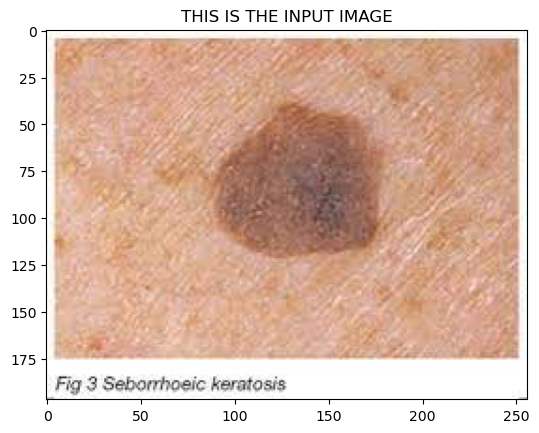

In [58]:
%matplotlib inline
import time 

input_image_path = input("Input path for image to be predicted(full path C:): ")

input_Image = Image.open(input_image_path)
input_image = input_Image.resize((128,128))
input_image = np.array(input_image)
input_image = input_image/255
input_image = np.reshape(input_image, [1,128,128,3])
input_prediction = model.predict(input_image)

input_pred_label = np.argmax(input_prediction)
if input_pred_label == 1:
    print("---------------------------------------------------")
    print("THIS TUMOR IS MALIGNANT WITH A 90% CERTAINTY")
    print("---------------------------------------------------")

elif input_pred_label == 0:
    print("---------------------------------------------------")
    print("THIS TUMOR IS BENIGN WITH A 90% CERTAINTY")
    print("---------------------------------------------------")

img = mpimg.imread(input_image_path)
imgplot=plt.imshow(img)
plt.title("THIS IS THE INPUT IMAGE")
plt.show()